In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

data = {
    'Content': [
        "Click here to win a special prize!", "Team meeting rescheduled. Check the portal and click for details.",
        "Claim your free vacation package now!", "A reminder for tomorrow's team-building exercise.",
        "Win a brand new car by participating in our survey!", "The reminder for project deadlines is attached.",
        "Join our team and win exciting bonuses!", "Click on the link for the annual team outing details.",
        "Last chance to claim your lottery money!", "The team has shared the minutes of the meeting. Click to access.",
        "Team's quarterly review is scheduled for next Monday.", "You won't believe how this single trick can help you win cash!",
        "Click here to review the latest project updates.", "Exclusive offer! Claim your free gift card now.",
        "Reminder: Year-end team gathering is on the 20th."
    ],
    'win': [1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    'click': [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
    'team': [0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
    'claim': [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
    'reminder': [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    'Category': ['Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham', 'Ham', 'Spam', 'Ham', 'Spam', 'Ham']
}

df = pd.DataFrame(data)

X = df[['win', 'click', 'team', 'claim', 'reminder']]
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

nb_predictions = nb_model.predict(X_test)

# KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)

# Evaluation of the models
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, nb_predictions)}")

print("\nKNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print(f"KNN Accuracy: {accuracy_score(y_test, knn_predictions)}")


Naive Bayes Classification Report:
              precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

Naive Bayes Accuracy: 1.0

KNN Classification Report:
              precision    recall  f1-score   support

         Ham       0.50      1.00      0.67         1
        Spam       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

KNN Accuracy: 0.6666666666666666


Index(['ID', 'Prediction', 'True_Label', 'prediction_label', 'TP', 'FP'], dtype='object')


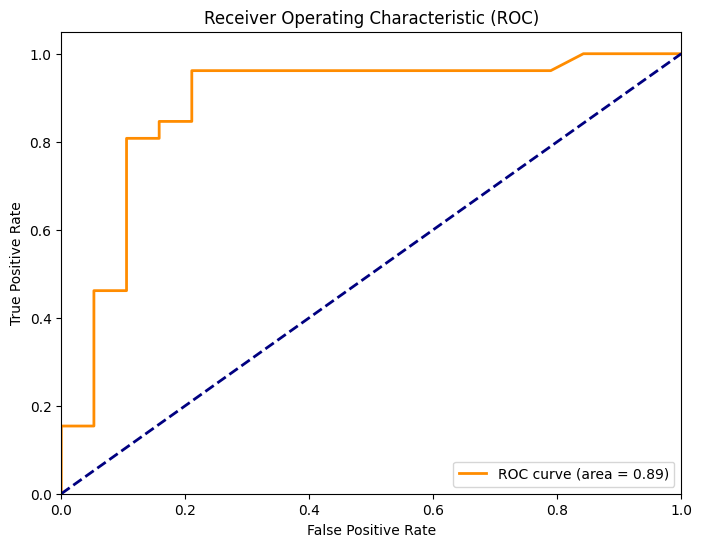

AUC score: 0.89


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('spam_dataset.csv')

print(df.columns)

X = df[['Prediction']]
y = df['True_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print(f'AUC score: {roc_auc:.2f}')